# §1: Setup and data

In [28]:
# Import libraries
from google.cloud import bigquery
from google.cloud import bigquery_storage

import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

In [5]:
# Setup Google Cloud credentials
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/your/service-account-key.json"

# Store the service key in the corresponding location in colab files
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/kamronaggor/Desktop/Desktop/Manual Library/School/URI/Fall 2025/DSP 461/Machine-Learning-Final/credentials/machine-learning-final-477822-031ba3aac2f9.json'

## Loading data from Bigquery
Here we use the bigquery library to send requests to bq api where our data is stored

In [6]:
load_dotenv()

from google.cloud import bigquery
client = bigquery.Client(project="machine-learning-final-477822")

## Creating our Dataframes

In [15]:
# Query the full ACS census tract table:
query = """
SELECT *
FROM `bigquery-public-data.census_bureau_acs.censustract_2020_5yr`
"""

# Run query
query_job = client.query(query)

acs_df = query_job.result().to_dataframe(create_bqstorage_client=False)

print("Loaded ACS dataframe with shape:", acs_df.shape)
acs_df.head()

Loaded ACS dataframe with shape: (85395, 245)


,geo_id,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,1001020200,18595.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,72.0,...,147.0,32.0,0.0,0.0,647.0,89.0,32.0,641.0,10.0,700.0
1,1001020300,47570.0,0.0,0.0,21.0,44.0,0.0,0.0,44.0,243.0,...,113.0,0.0,0.0,34.0,2363.0,143.0,232.0,2363.0,32.0,1959.0
2,1001020400,37660.0,10.0,10.0,10.0,17.0,0.0,0.0,17.0,257.0,...,105.0,23.0,25.0,28.0,3097.0,121.0,258.0,3085.0,45.0,1583.0
3,1001020503,28605.0,0.0,0.0,96.0,18.0,0.0,0.0,18.0,252.0,...,0.0,0.0,0.0,22.0,2397.0,218.0,105.0,2397.0,121.0,1606.0
4,1001020600,23255.0,0.0,0.0,40.0,11.0,0.0,0.0,11.0,145.0,...,134.0,43.0,22.0,6.0,2667.0,193.0,176.0,2551.0,80.0,1212.0


In [16]:
# From here we filter into DP05 and DP03 as needed for analysis

# DP03: Economic features
dp03_cols = [
    "median_income",
    "income_per_capita",
    "poverty",
    "pop_in_labor_force",
    "employed_pop",
    "unemployed_pop",
    "not_in_labor_force",
    "commuters_16_over",
    "aggregate_travel_time_to_work",
    "commute_less_10_mins",
    "commute_5_9_mins",
    "commute_10_14_mins",
    "commute_15_19_mins",
    "commute_20_24_mins",
    "commute_25_29_mins",
    "commute_30_34_mins",
    "commute_35_39_mins",
    "commute_40_44_mins",
    "commute_45_59_mins",
    "commute_60_more_mins",
    "worked_at_home",
    "walked_to_work",
    "no_car",
    "one_car",
    "two_cars",
    "three_cars",
    "four_more_cars",
    "gini_index",
]

# DP05: Demographic features
dp05_cols = [
    "total_pop",
    "male_pop",
    "female_pop",
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_to_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_to_61",
    "male_62_to_64",
    "male_65_to_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_and_over",
    "female_under_5",
    "female_5_to_9",
    "female_10_to_14",
    "female_15_to_17",
    "female_18_to_19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_to_61",
    "female_62_to_64",
    "female_65_to_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_and_over",
    "white_pop",
    "black_pop",
    "asian_pop",
    "amerindian_pop",
    "other_race_pop",
    "two_or_more_races_pop",
    "hispanic_pop",
    "white_including_hispanic",
    "black_including_hispanic",
    "asian_including_hispanic",
]

In [17]:
# Create the DFs
dp03_df = acs_df[["geo_id"] + dp03_cols].copy()

dp05_df = acs_df[["geo_id"] + dp05_cols].copy()

dp03_df.head(), dp05_df.head()

(       geo_id  median_income  income_per_capita  poverty  pop_in_labor_force  \
 0  1001020200        49144.0            22772.0    257.0               729.0   
 1  1001020300        62423.0            25291.0    533.0              2015.0   
 2  1001020400        64310.0            47056.0    281.0              1668.0   
 3  1001020503        81165.0            40522.0    319.0              1670.0   
 4  1001020600        43030.0            24783.0    831.0              1263.0   
 
    employed_pop  unemployed_pop  not_in_labor_force  commuters_16_over  \
 0         688.0            29.0               721.0              690.0   
 1        1941.0            53.0               915.0             1927.0   
 2        1619.0            39.0              1391.0             1538.0   
 3        1547.0            27.0              1134.0             1485.0   
 4        1189.0            34.0              1548.0             1132.0   
 
    aggregate_travel_time_to_work  ...  commute_45_59_mins  

# §2: Cleaning

In [24]:
# Create target variable 'high_rent_burden' 
acs_df['high_rent_burden'] = acs_df['percent_income_spent_on_rent'] >= 30

acs_df['high_rent_burden'].head()

0     True
1    False
2    False
3    False
4    False
Name: high_rent_burden, dtype: bool

In [18]:
# Dim and shape
acs_df.shape
acs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Columns: 245 entries, geo_id to workers_16_and_over
dtypes: float64(244), object(1)
memory usage: 159.6+ MB


In [19]:
# Handling Sentinel Codes:
sentinel_values = [-666666666, -777777777, -888888888, -999999999]
acs_df.replace(sentinel_values, pd.NA, inplace=True)

In [20]:
acs_df["county_fips"] = acs_df["geo_id"].str[:5] # We can now visualize by county

(array([ 154., 1030., 4300., 8738., 9671., 8988., 8209., 6593., 5589.,
        5309., 4210., 3648., 2577., 2420., 2110., 1408.,  852.,  817.,
         795.,  544.,  364.,  322.,  305.,  187.,  139.,  128.,  139.,
          89.,   61.,  220.]),
 array([  99. ,  212.4,  325.8,  439.2,  552.6,  666. ,  779.4,  892.8,
        1006.2, 1119.6, 1233. , 1346.4, 1459.8, 1573.2, 1686.6, 1800. ,
        1913.4, 2026.8, 2140.2, 2253.6, 2367. , 2480.4, 2593.8, 2707.2,
        2820.6, 2934. , 3047.4, 3160.8, 3274.2, 3387.6, 3501. ]),
 <BarContainer object of 30 artists>)

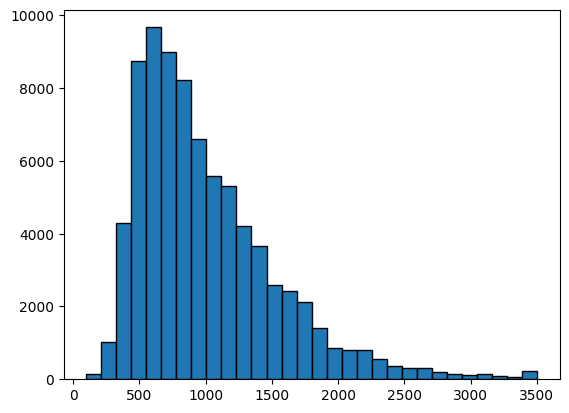

In [21]:
# Take a look at median_rent distribution
import matplotlib.pyplot as plt
plt.hist(acs_df['median_rent'].dropna(), bins=30, edgecolor='k')

In [22]:
# Examine data types
acs_df.dtypes

geo_id                            object
aggregate_travel_time_to_work     object
amerindian_including_hispanic    float64
amerindian_pop                   float64
armed_forces                     float64
                                  ...   
white_male_55_64                 float64
white_pop                        float64
worked_at_home                   float64
workers_16_and_over              float64
county_fips                       object
Length: 246, dtype: object

In [25]:
# We need to convert some columns to numeric
# We need to cast geo_id and high_rent_burden:
acs_df["geo_id"] = acs_df["geo_id"].astype(str)
acs_df["county_fips"] = acs_df["county_fips"].astype(str)
acs_df["high_rent_burden"] = acs_df["high_rent_burden"].astype(int)
acs_df["gini_index"] = pd.to_numeric(acs_df["gini_index"], errors='coerce')
acs_df["income_per_capita"] = pd.to_numeric(acs_df["income_per_capita"], errors='coerce')
acs_df["median_age"] = pd.to_numeric(acs_df["median_age"], errors='coerce')
acs_df["median_income"] = pd.to_numeric(acs_df["median_income"], errors='coerce')
acs_df["median_rent"] = pd.to_numeric(acs_df["median_rent"], errors='coerce')
acs_df["median_year_structure_built"] = pd.to_numeric(acs_df["median_year_structure_built"], errors='coerce')
acs_df["owner_occupied_housing_units_lower_value_quartile"] = pd.to_numeric(acs_df["owner_occupied_housing_units_lower_value_quartile"], errors='coerce')
acs_df["owner_occupied_housing_units_median_value"] = pd.to_numeric(acs_df["owner_occupied_housing_units_median_value"], errors='coerce')
acs_df["owner_occupied_housing_units_upper_value_quartile"] = pd.to_numeric(acs_df["owner_occupied_housing_units_upper_value_quartile"], errors='coerce')
acs_df["percent_income_spent_on_rent"] = pd.to_numeric(acs_df["percent_income_spent_on_rent"], errors='coerce')
acs_df["renter_occupied_housing_units_paying_cash_median_gross_rent"] = pd.to_numeric(acs_df["renter_occupied_housing_units_paying_cash_median_gross_rent"], errors='coerce')

Some of these measures are not really useful as pure counts, such as `unemployment_pop`, `vacant_housing_units`, etc. This is because they will end up dominating the model and also make it difficult to generalize across other areas of the country. Rather, we should insert corresponding rates columns:

In [27]:
acs_df["unemployment_rate"] = acs_df["unemployed_pop"] / acs_df["civilian_labor_force"]
acs_df["vacancy_rate"] = acs_df["vacant_housing_units"] / acs_df["occupied_housing_units"]
acs_df["renter_share"] = acs_df["housing_units_renter_occupied"] / acs_df["occupied_housing_units"]

Another issue to account for in this step is how predictors will weight numerical values. For instance, columns like `gini_index` and the rates we just defined will contain small numbers while populations will contain large scalars.

In [31]:
# Filter by RI tracts since that's what we're training the data on
ri_df = acs_df[acs_df["geo_id"].str.startswith("44")].copy()

# Copy for scaling
ri_df_scaled = ri_df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ri_df_scaled.select_dtypes(include=[np.number]).columns.drop("high_rent_burden")

# Scale only the numerical columns
ri_df_scaled[numerical_cols] = scaler.fit_transform(ri_df_scaled[numerical_cols])

ri_df_scaled.head()

/Users/kamronaggor/Desktop/Desktop/Manual Library/School/URI/Fall 2025/DSP 461/Machine-Learning-Final/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/kamronaggor/Desktop/Desktop/Manual Library/School/URI/Fall 2025/DSP 461/Machine-Learning-Final/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/kamronaggor/Desktop/Desktop/Manual Library/School/URI/Fall 2025/DSP 461/Machine-Learning-Final/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,geo_id,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,...,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,county_fips,high_rent_burden,unemployment_rate,vacancy_rate,renter_share
35812,44001030100,55345.0,0.445068,0.703766,-0.154766,-0.185759,1.385073,0.134857,-0.172487,NaN,...,0.428558,-0.073794,0.518044,1.565051,-0.010819,44001,1,-0.437258,-0.407463,-1.068753
35813,44001030200,44770.0,-0.357635,-0.288099,-0.154766,-0.583685,-0.427238,-0.440226,-0.575016,NaN,...,0.742077,-0.086887,-0.093691,-0.148741,-0.611861,44001,1,-0.602598,-0.432287,-0.794128
35814,44001030300,51265.0,-0.357635,-0.288099,-0.052555,0.380305,0.098917,0.278628,0.400125,NaN,...,0.122007,1.058773,0.540147,1.017036,0.145600,44001,0,-0.815356,-0.248510,-1.347801
35815,44001030400,44615.0,-0.357635,-0.288099,-0.154766,0.077657,0.800457,-0.440226,0.093976,NaN,...,1.466652,0.240444,0.363915,1.355809,-0.132752,44001,1,-1.484963,-0.318302,-1.488810
35816,44001030500,46980.0,-0.357635,-0.288099,-0.154766,-0.768637,-0.427238,-0.440226,-0.762107,NaN,...,0.268316,0.351737,-0.065613,-0.387875,-0.371691,44001,1,-0.314463,-0.228554,1.272194


# §3: Exploratory Data Analysis

## DP03 - ACS Economic Characteristics

In [ ]:
dp03_df_ri = ri_df_scaled[["geo_id"] + dp03_cols + ["high_rent_burden"]].copy()

## DP05 - ACS Demographic and Housing Characteristics

In [ ]:
dp05_df_ri = ri_df_scaled[["geo_id"] + dp05_cols + ["high_rent_burden"]].copy()